In [55]:
#!python

from numpy import cos, sin, pi, absolute, arange
import numpy as np
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show





Zuerst erzeugen wir ein verrauschtes Signal, indem wir eine Kosinusfunktion mit anderen Sinussignalen überlagern.

Base freq:  3
Second freq:  450.0
Third freq:  250.0


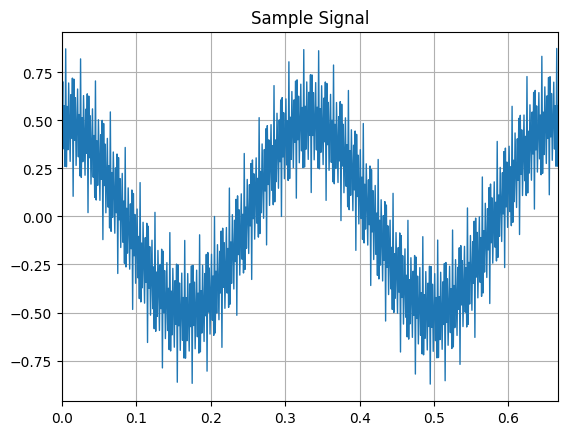

In [56]:
wave_duration = 3
sample_rate = 1000
nyq_rate = sample_rate / 2.0

samples = wave_duration*sample_rate


t = np.linspace(0, wave_duration, samples, endpoint=False)

attenuation = 0.5
base_freq = 3

f1 = base_freq
w1 = 2*pi*f1
print("Base freq: ", base_freq)
f2 = nyq_rate*0.9
w2 = 2*pi*f2
print("Second freq: ", f2)
f3 = nyq_rate*0.5
w3 = 2*pi*f3
print("Third freq: ", f3)


x = attenuation*cos(w1*t) + attenuation*0.5*sin(w2*t) +  attenuation* 0.25*sin(w3*t)


figure(1)
plot(t, x, linewidth=1)
title('Sample Signal')
xlim(0, 2* 1/base_freq)
grid(True)



Wir etablieren die wichtigsten Koeffizienten für unseren Filter. das ist einmal Fg in der form fa/fg, wobei fa die Abtastfrequenz ist und fg die Grenzfrequenz. Dann etablieren wir die Ordnung des Filters, indem wir die Gewünschte Übergangsbreite (oder Roll-Off) des Filters angeben. 

In [57]:
cutoff = 10


Fg = cutoff/sample_rate


# Transition band, as a fraction of the sampling rate

transition_band = 15

b = transition_band / sample_rate


N = int(np.ceil((4 / b)))
if not N % 2: N += 1 



taps = np.zeros(N)
window = np.zeros(N)


print("Cutoff frequency: ", Fg*sample_rate, "Hz")
print("Number of taps: ", N)


Cutoff frequency:  10.0 Hz
Number of taps:  267


Unter verwendung der sinc Funktion erzeugen wir den Filter und plotten ihn.

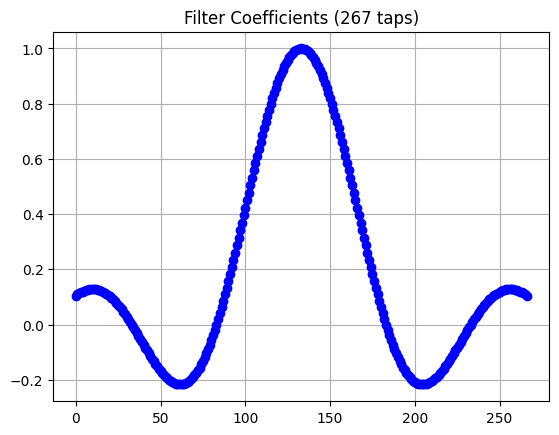

In [58]:
for k in range(N):

    xarg = 2 * Fg * (k - (N - 1) / 2) 

    if xarg == 0:
        taps[k] = 1
    else:
        taps[k] = sin(pi*xarg) / (pi* xarg)
    




#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------
figure(2)
plot(taps,'bo-', linewidth=1)
title('Filter Coefficients (%d taps)' % N)
grid(True)



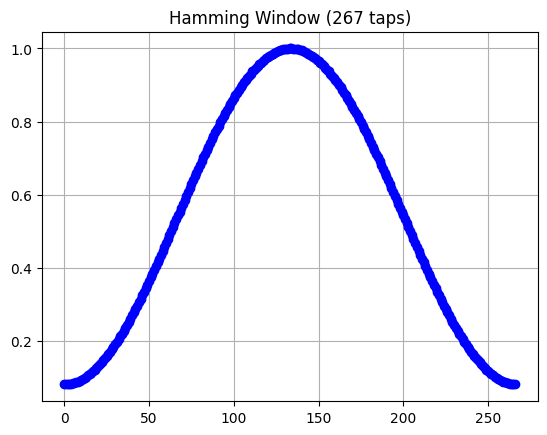

In [59]:

for k in range(N):
    window[k] = 0.54 - 0.46 * cos((2*pi*k)/N)

figure(3)
plot(window,'bo-', linewidth=2)
title('Hamming Window (%d taps)' % N)
grid(True)    





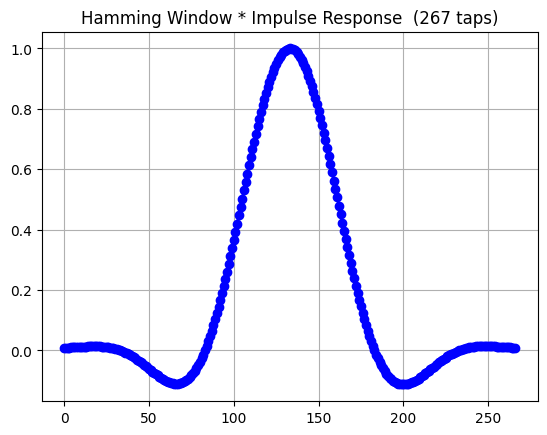

In [60]:
for k in range(N):
    taps[k] = taps[k] * window[k]



figure(4)
plot(taps,'bo-', linewidth=2)
title('Hamming Window * Impulse Response  (%d taps)' % N)
grid(True)    
    


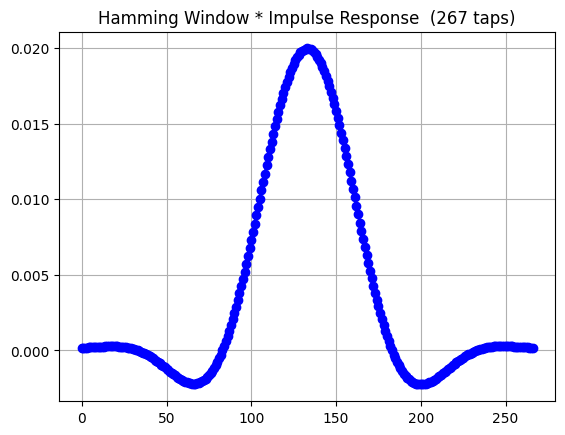

In [61]:

taps_sum = np.sum(taps)

for k in range(N):
    taps[k] = taps[k] / taps_sum


figure(16)
plot(taps,'bo-', linewidth=2)
title('Hamming Window * Impulse Response  (%d taps)' % N)
grid(True)    





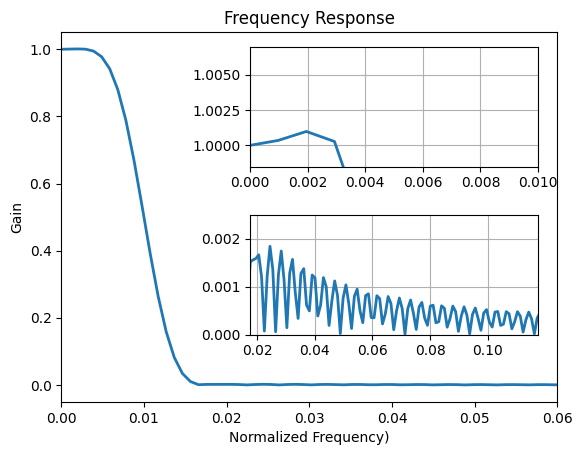

In [62]:
figure(5)
clf()
w, h = freqz(taps)
normalized_frequency = ((w/pi)*nyq_rate)/1000

plot(normalized_frequency, absolute(h), linewidth=2)
xlim(0,(cutoff+50)/1000)    
xlabel('Normalized Frequency)')
ylabel('Gain')
title('Frequency Response')

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot(normalized_frequency, absolute(h), linewidth=2)
xlim(0,(cutoff)/1000)
ylim(0.9985, 1.007)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot(normalized_frequency, absolute(h), linewidth=2)
xlim((cutoff/1000) + (transition_band/2)/1000 , (cutoff/1000) + (transition_band/2)/1000 + 0.1)
ylim(0.0, 0.0025)
grid(True)

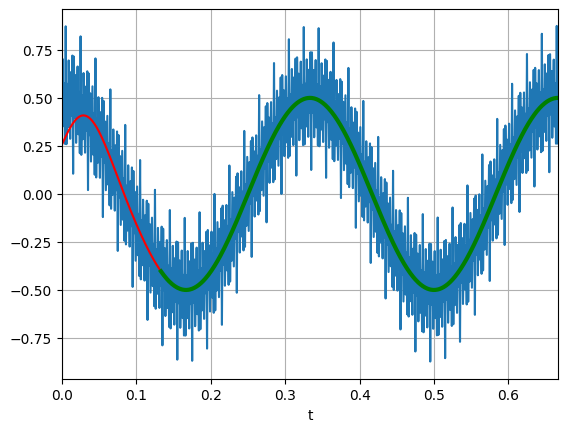

In [63]:


filtered_x = lfilter(taps, 1.0, x)


# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(29)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=3)
xlim(0, 2* 1/base_freq)
xlabel('t')
grid(True)

show()